## London Housing dataset
#### This dataset is primarily centered around the housing market of London. It contains a lot of additional relevant data:

##### Monthly average house prices
##### Yearly number of houses sold
##### Monthly number of crimes committed

### The data used here is from year 1995 to 2019 of each different

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()
import os

In [110]:
file_path = os.path.join(os.getcwd(),'raw_data/5. London Housing Data.csv')
df = pd.read_csv(file_path)
df_copy = df.copy()

### 1 Exploratory Analysis of the data

In [111]:
df_copy.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [112]:
df_copy.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [113]:
df_copy.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [114]:
df_copy.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [116]:
df_copy.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


### 3 Exploratory Analysis of the data

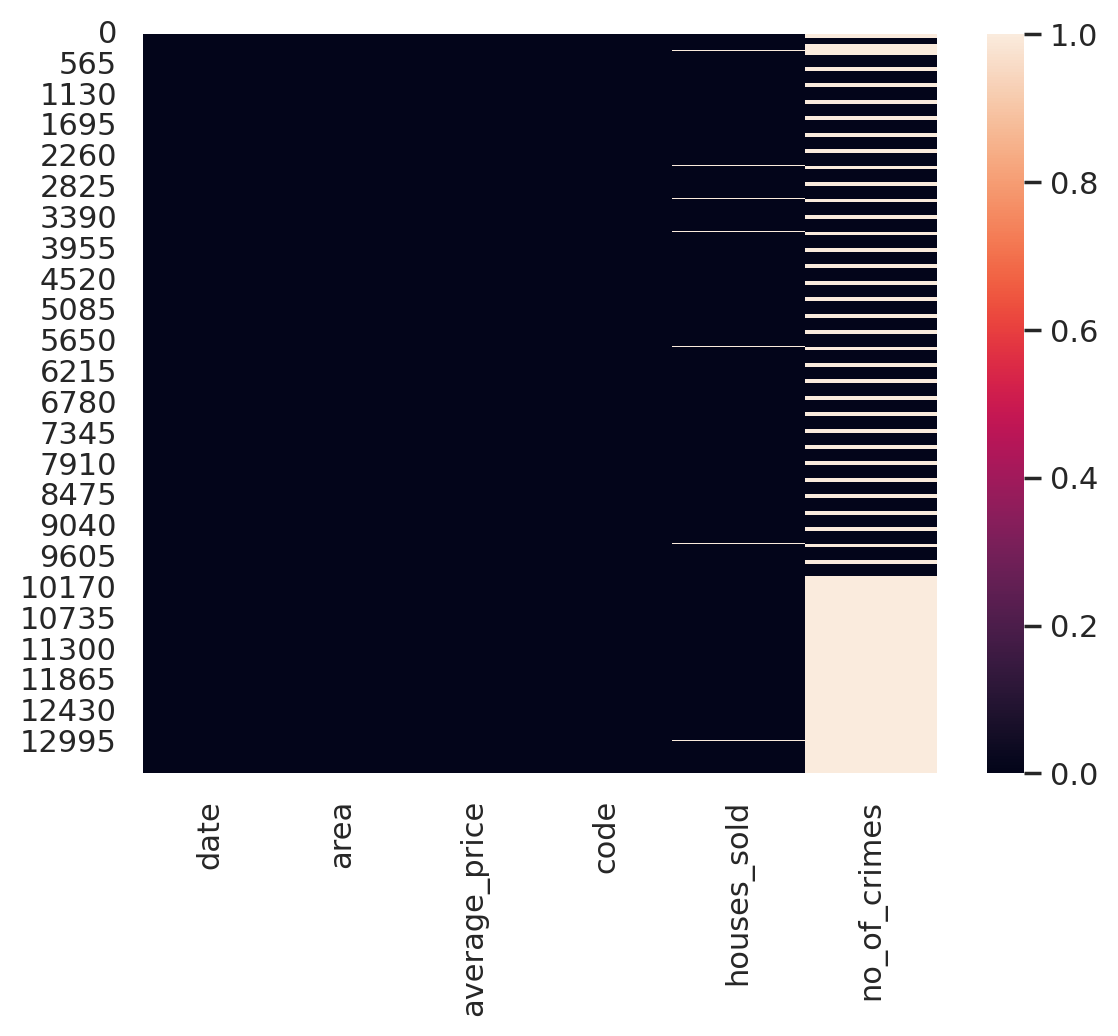

In [117]:
sns.heatmap(df_copy.isnull())
plt.show()

### A) Convert the datatype of 'Date' column to Date-Time Format

In [118]:
df_copy['date'] = pd.to_datetime(df_copy['date'])

In [119]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 635.2+ KB


In [120]:
df_copy.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


### B.1) Add a new column "year" in the dataframe, which contains years only

In [121]:
df_copy['Year'] = df_copy['date'].dt.year

In [122]:
df_copy.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


### B.2) Add a new column "Month" as 2nd column in the dataframe, which contains month only

In [123]:
df_copy.insert(1,'Month',df_copy['date'].dt.month)

In [124]:
df_copy.head()

,date,Month,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995


### C) Remove the columns 'Years' and 'Month' from the dataframe

In [125]:
df_copy.drop(['Month','Year'],axis=1,inplace=True)

In [126]:
df_copy.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


### D) Show all the records where 'No.of Crimes' is 0. And, how many such records are there?

In [127]:
len(df_copy[df_copy['no_of_crimes'] == 0])

104

### E) What is the maximum & minimum 'Average_price' per year in england?

In [128]:
df_copy[df_copy['area'] == 'england'].groupby(df_copy['date'].dt.year)['average_price'].max()




date
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [129]:
df_copy[df_copy['area'] == 'england'].groupby(df_copy['date'].dt.year)['average_price'].min()

date
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

In [130]:
df_copy[df_copy['area'] == 'england'].groupby(df_copy['date'].dt.year)['average_price'].mean()

date
1995     53322.416667
1996     54151.500000
1997     59160.666667
1998     64301.666667
1999     70070.750000
2000     80814.333333
2001     90306.750000
2002    107981.500000
2003    130218.583333
2004    152314.416667
2005    163570.000000
2006    174351.500000
2007    190025.583333
2008    182379.916667
2009    166558.666667
2010    177472.666667
2011    175230.000000
2012    177488.000000
2013    182581.416667
2014    197771.083333
2015    211174.750000
2016    227337.166667
2017    238161.166667
2018    245018.333333
2019    247101.083333
2020    247355.000000
Name: average_price, dtype: float64

### F) What is the maximum & Minimum No. of crimes recorded per area?

In [133]:
df_copy.groupby('area').no_of_crimes.max().sort_values(ascending=False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [135]:
df_copy.groupby('area').no_of_crimes.min().sort_values(ascending=True)

area
city of london               0.0
kingston upon thames       692.0
richmond upon thames       700.0
sutton                     787.0
merton                     819.0
bexley                     860.0
harrow                     937.0
havering                  1130.0
barking and dagenham      1217.0
hammersmith and fulham    1323.0
kensington and chelsea    1347.0
bromley                   1441.0
hillingdon                1445.0
redbridge                 1487.0
greenwich                 1513.0
hounslow                  1529.0
haringey                  1536.0
waltham forest            1575.0
wandsworth                1582.0
enfield                   1635.0
tower hamlets             1646.0
lewisham                  1675.0
barnet                    1703.0
brent                     1850.0
hackney                   1870.0
ealing                    1871.0
islington                 1871.0
croydon                   2031.0
camden                    2079.0
newham                    2130.0
south

### G) Show the total count of records of each area, where average price is less than 10000

In [138]:
df_copy[df_copy['average_price'] < 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              